In [1]:
import joblib
import pandas as pd
from xgboost import XGBClassifier
import shap
shap.initjs()
import numpy as np
model = joblib.load("C:/Users/johns/Documents/10semester/P10/Machine/best_xgboost_model_preperi.joblib")

X_test = pd.read_csv("C:/Users/johns/Documents/10semester/P10/TestTrainingSet/test_ids_pre&peri.csv")

X_test =X_test.drop(["caseid","icu_days_binary", "subjectid"], axis='columns')
shap_df = pd.read_csv("C:/Users/johns/Documents/10semester/P10/Machine/shap_values_preperi.csv")

# Lag en kopi av X_test med nye navn
X_test_renamed = X_test.copy()
X_test_renamed = X_test.rename(columns={
    'has_aline': 'Arterial Line',
    'Thoracic surgery': 'Thoracic Surgery',
    'anesthesia_duration': 'Anaesthesia Duration',
    'asa': 'ASA-PS Score',
    'age': 'Age',
    'prehb': 'Preoperative Hemoglobin', 
    'op_duration_min': 'Operation Duration',
    'prek': 'Preoperative K',
    'preca': 'Preoperative Calcium',
    'prena': 'Preoperative Na',
    'RBC': 'Intraoperative RBC Transfusion',
    'under36': 'Body Temperature < 36',
    'prept': 'Preoperative Prothrombin Time', 
    'value_phe': 'Phenylephrine',
    'preplt': 'Preoperative Platelet Count', 
    'preaptt': 'Preoperative aPTT',
    'bmi': 'BMI',
    'height': 'Height',
    'RR_n20': 'Respiratory Rate > 20',
    'RR_n12': 'Respiratory Rate < 12'
    })

X_test_renamed_short = X_test.rename(columns={
    'has_aline': 'AL',
    'Thoracic surgery': 'TS',
    'anesthesia_duration': 'AD',
    'asa': 'ASA Score',
    'age': 'Age',
    'prehb': 'Pre Hgb', 
    'op_duration_min': 'OD',
    'prek': 'Preo K',
    'preca': 'Pre Ca',
    'prena': 'Pre Na',
    'RBC': 'RBC',
    'under36': 'BT < 36 °C',
    'prept': 'Pre Prothrombin Time', 
    'value_phe': 'Phenylephrine',
    'preplt': 'Pre Platelet Count', 
    'preaptt': 'Pre aPTT',
    'bmi': 'BMI',
    'height': 'Height',
    'RR_n20': 'RR > 20',
    'RR_n12': 'RR < 12'
    })



c:\Users\johns\anaconda3\lib\pickle.py:1718: UserWarning: [12:24:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\data\../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)


In [2]:
prediksjon = model.predict(X_test)

print(len(X_test))

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

1251


In [ ]:
print(shap_values)
  

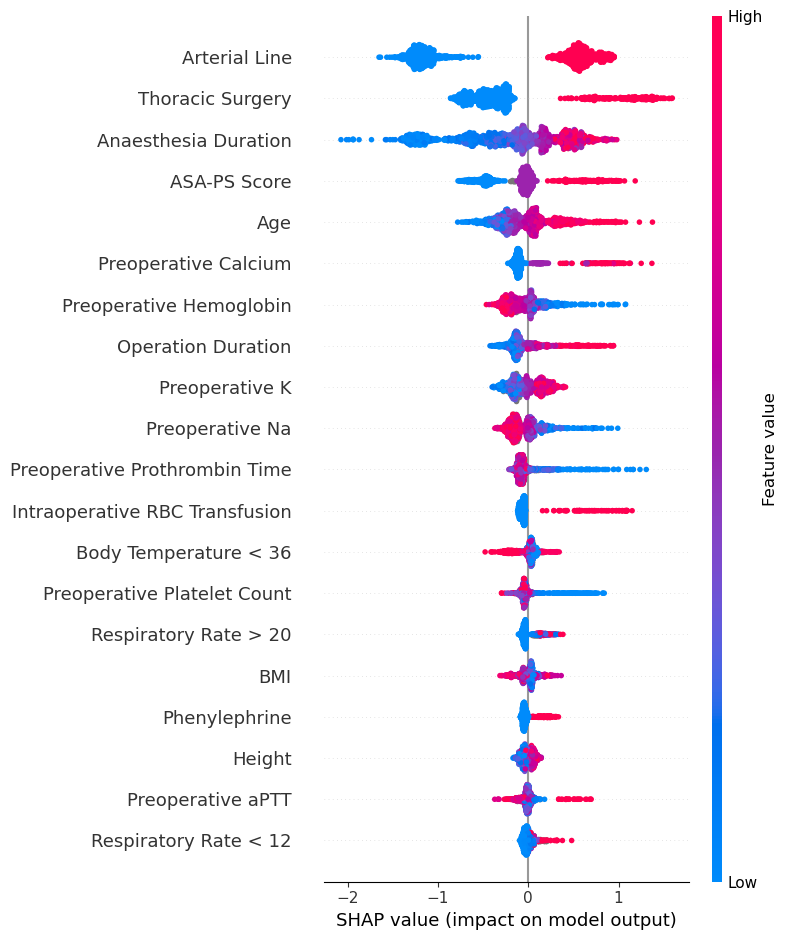

In [3]:
shap.summary_plot(shap_values, X_test_renamed)

In [26]:
base_value = explainer.expected_value  # En enkelt verdi hvis det er binær klassifikasjon
x_instance = X_test_renamed_short.iloc[122]            # Velg én pasient (rad 0)
shap.force_plot(base_value, shap_values[122], x_instance)

In [9]:
log_odds = -1.504
probability = 1 / (1 + np.exp(-log_odds))
print(f"Sannsynlighet: {probability:.3f}")
print("\n%:", probability*100)

Sannsynlighet: 0.182

%: 18.182969567174332
